---
title: 'Chapter 2: Intensity operations'
jupyter: python3
format:
  html:
    embed-resources: true
  pdf:
    documentclass: article
    toc: true
    fontsize: 12pt
    geometry:
      - top=1in
      - bottom=1in
      - left=1in
      - right=1in
      - heightrounded
---


# Introduction
Intensity operations change the intensity value of a pixels so that the image
appears different from the initial image. These operations are useful to
transform an input image into a form that is more suited for downstream
processing. An image might be too dim or have a low contrast, intensity
operations on these images transform it into a more desired image. 


# Pixel wise intensity operations
Pixel wise intensity operations transforms each individual pixel of an image
independent of its adjacent pixels. The type of transformation applied to the 
pixel determines change in the output image. 

## Image gain
Adjusting the Image gain simply multiplies the each pixel by of an image by a
constant value. The multiplication factor is called the gain. If the gain is
more than 1 the image becomes brighter and if the gain is less than 1 it
becomes darker. 

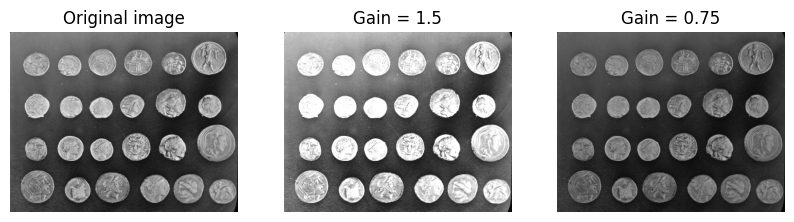

In [82]:
# Load the required libraries
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt


# Load the coins data
img = ski.data.coins()

# Plot the image
fig, ax =  plt.subplots(1, 3, figsize = (10, 9))
ax[0].imshow(img, cmap = 'gray', vmax = 256)
ax[0].set_title('Original image')
ax[1].imshow(img * 1.5, cmap = 'gray', vmax = 256)
ax[1].set_title('Gain = 1.5')
ax[2].imshow(img * 0.75, cmap = 'gray', vmax = 256)
ax[2].set_title('Gain = 0.75')
for a in ax:
    a.set_axis_off()

As an important note while preforming intensity operations, we need to be
extremely careful not the exceed the intensity of range of image when
manipulating it.  In a 8 bit image, if we multiply a pixel with intensity 130
by 2, we are going to get a value of 260 which is larger than the maximum
possible value of 255. This is going to result in undesirable effects. Most
often it the pixel will roll-over, i.e 256 will become 0, 247 becomes 1, and
so on.

## Gamma correction

Another useful pixel wise operation is gamma correction. Each pixel is the
image is transformed using $o = i ^ \gamma$. The curve looks as follows
for different values of $\gamma$:


Text(0, 0.5, 'Output intensity')

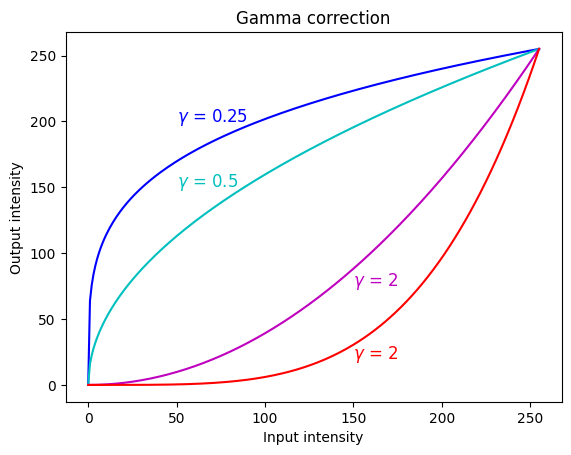

In [83]:
# Create an array with values 0 - 255
in_range = np.arange(0, 256)

# Plot the gamma corrections at different gamma values
fig, ax =  plt.subplots()
ax.plot(in_range, ((in_range / 255) ** 0.25) * 255, color = 'b')
plt.text(50, 200, '$\gamma$ = 0.25', fontsize = 12, color = 'b')

ax.plot(in_range, ((in_range / 255) ** 0.5) * 255, color = 'c')
plt.text(50, 150, '$\gamma$ = 0.5', fontsize = 12, color = 'c')

ax.plot(in_range, ((in_range / 255) ** 2) * 255, color = 'm')
plt.text(150, 75, '$\gamma$ = 2', fontsize = 12, color = 'm')

ax.plot(in_range, ((in_range / 255) ** 4) * 255, color = 'r')
plt.text(150, 20, '$\gamma$ = 2', fontsize = 12, color = 'r')

ax.set_title('Gamma correction')
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')

When the gamma value is less than 1 (blue and cyan lines), input intensity
values between 0 and 50 are mapped to output values ranging from 0 to 100. This
means that that the smaller values in the input image are amplified to a larger
range in the output image. So a dark input image becomes brighter when the
gamma value is less than one. The opposite happens when the gamma value is
greater than 1, a very bright input image becomes darker. 

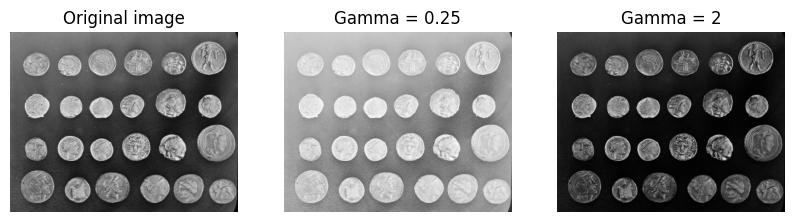

In [84]:
# Load the coins data
img = ski.data.coins()

# Perform gamma correction
gamma_025 = ski.exposure.adjust_gamma(img, 0.25)
gamma_2 = ski.exposure.adjust_gamma(img, 2)

# Plot the image
fig, ax =  plt.subplots(1, 3, figsize = (10, 9))
ax[0].imshow(img, cmap = 'gray', vmax = 256)
ax[0].set_title('Original image')
ax[1].imshow(gamma_025, cmap = 'gray', vmax = 256)
ax[1].set_title('Gamma = 0.25')
ax[2].imshow(gamma_2, cmap = 'gray', vmax = 256)
ax[2].set_title('Gamma = 2')
for a in ax:
    a.set_axis_off()

# Image intensity histogram

An image is a matrix containing the pixel intensity values.  An image intensity
histogram is a distribution of the number of pixels of at each intensity
values.  The x-axis is the intensity values, and hence in the range between 0
and the 255 for a 8 bit image (and between 0 and 65535 for a 16 bit image). The
y-axis is the number of pixels at a particular intensity value.

Text(0, 0.5, 'Number of pixels')

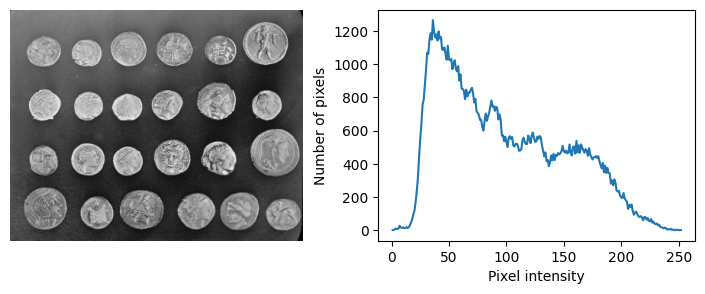

In [85]:
# Load the coins data
img = ski.data.coins()

# Get the histogram
hist, hist_centers = ski.exposure.histogram(img)

# Plot the histogram
fig, ax =  plt.subplots(1, 2, figsize = (9,3))
ax[0].imshow(img, cmap = 'gray', vmax = 256)
ax[0].set_axis_off()
ax[1].plot(hist_centers, hist)
ax[1].set_xlabel('Pixel intensity')
ax[1].set_ylabel('Number of pixels')

The histogram tells us a lot about the image. An grayscale image that has a
distinct foreground and background will have a bimodal histogram. A peak on
the left of the histogram would correspond to the background and the peak on
the right to the foreground.  For example, from the histogram above we see a
large peak at ~50 implying that most background pixels at around this value.
The coins are the brightest part of the image and the peak above ~125 likely
corresponds to the coins. 

We can also infer the contrast of the image from the histogram. The intensity
values of the coins image uses almost the entire range of the histogram, and
hence are well distinguished between distinct intensities.  Whereas, a "darker"
image would have intensities concentrated at the left end and a "brighter"
image would have pixel concentrated on the right end of the histogram.
Our gamma correction makes of the coins image made it brighter or darker, and
hence their histograms are more narrow. 


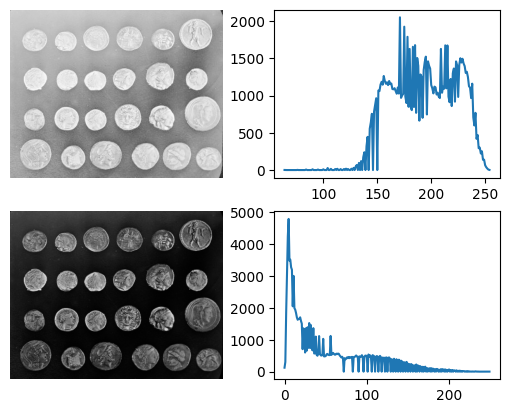

In [86]:
# Get the histogram of the gamma corrected images
hist_025, hist_centers_025 = ski.exposure.histogram(gamma_025)
hist_2, hist_centers_2 = ski.exposure.histogram(gamma_2)

# Plot the histogram
fig, ax =  plt.subplots(2, 2)
ax[0, 0].imshow(gamma_025, cmap = 'gray')
ax[0, 0].set_axis_off()
ax[0, 1].plot(hist_centers_025, hist_025)
ax[1, 0].imshow(gamma_2, cmap = 'gray')
ax[1, 0].set_axis_off()
ax[1, 1].plot(hist_centers_2, hist_2)

# Image smoothing

Image smoothing or blurring an image is used to reduce "noise" in an image.
Noise in an image are rapid variations in pixel intensity as we move across a
image.  As we will see in the next chapter, these rapid variations can become
quite problematic for downstream analysis.  Image smoothing helps get rid of
these variations and make an image as smooth as possible. Image smoothing is
often the very first step of an image analysis pipeline.

The intensity operations we have seen so far operate on each pixel independent
of its adjacent pixels. Image smoothing changes a pixel value based on its
surround pixel values.

## Mean smoothing
In mean smoothing, each pixel value is replaced by the average of its
neighbors. The surrounding window of neighbors to average over is a parameter
to the filter.  Using a 3x3 window around a pixel would result in 9 pixel
intensity values being averaged. The pixel at the center of the gird is replaced
with this averaged value.  The window size determines how smooth the image
gets. As the window becomes larger the the image get smoother but risks losing
important features.

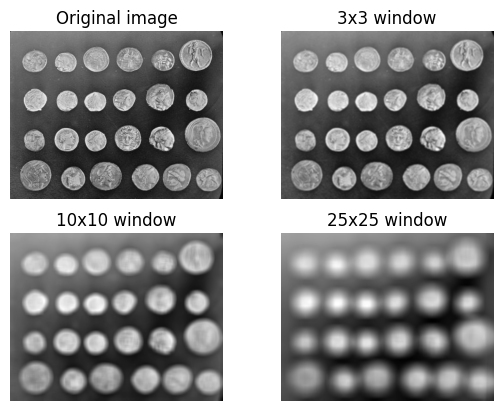

In [87]:
# Load the coins data
img = ski.data.coins()

# Mean smoothing at different window sizes
img_mean_3 = ski.filters.rank.mean(img, 
  ski.morphology.footprint_rectangle((3, 3)))
img_mean_10 = ski.filters.rank.mean(img, 
  ski.morphology.footprint_rectangle((10, 10)))
img_mean_25 = ski.filters.rank.mean(img, 
  ski.morphology.footprint_rectangle((25, 25)))

# Plot the image
fig, ax =  plt.subplots(2, 2)
ax[0, 0].imshow(img, cmap = 'gray')
ax[0, 0].set_title('Original image')
ax[0, 1].imshow(img_mean_3, cmap = 'gray')
ax[0, 1].set_title('3x3 window')
ax[1, 0].imshow(img_mean_10, cmap = 'gray')
ax[1, 0].set_title('10x10 window')
ax[1, 1].imshow(img_mean_25, cmap = 'gray')
ax[1, 1].set_title('25x25 window')
for a in ax.flatten():
    a.set_axis_off()

## Gaussian smoothing
In mean smoothing, we took the average intensity in the window, where as in
Gaussian smoothing we take a weighted average. The weights are determined by
the Gaussian distribution.  Without getting into the details, the Gaussian
smoothing behaves much better at transition points (such as when going between
the coins and background), and produces a much smoother transitions.  We do not
have to explicitly define the window size for Gaussian smoothing, it is
automatically determined by the standard deviation (sigma) of the Gaussian
distribution. 

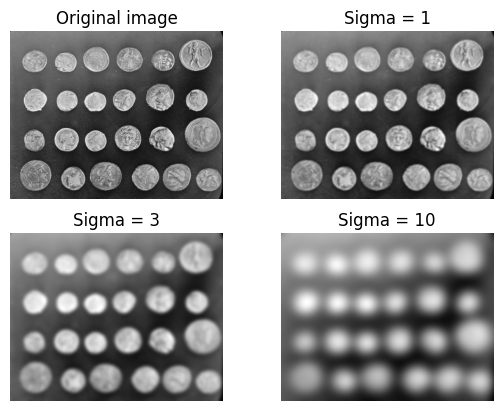

In [88]:
# Load the coins data
img = ski.data.coins()

# Gaussian smoothing at different sigma values
img_gauss_1 = ski.filters.gaussian(img, sigma = 1)
img_gauss_3 = ski.filters.gaussian(img, sigma = 3)
img_gauss_10 = ski.filters.gaussian(img, sigma = 10)

# Plot the image
fig, ax =  plt.subplots(2, 2)
ax[0, 0].imshow(img, cmap = 'gray')
ax[0, 0].set_title('Original image')
ax[0, 1].imshow(img_gauss_1, cmap = 'gray')
ax[0, 1].set_title('Sigma = 1')
ax[1, 0].imshow(img_gauss_3, cmap = 'gray')
ax[1, 0].set_title('Sigma = 3')
ax[1, 1].imshow(img_gauss_10, cmap = 'gray')
ax[1, 1].set_title('Sigma = 10')
for a in ax.flatten():
    a.set_axis_off()